In [1]:
import logging

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as PILImage


from aspire.classification import RIRClass2D
from aspire.image import Image

from aspire.source import ArrayImageSource # Helpful hint if you want to BYO array.
#from aspire.source import Simulation
from aspire.volume import Volume
from aspire.utils import gaussian_2d


logger = logging.getLogger(__name__)


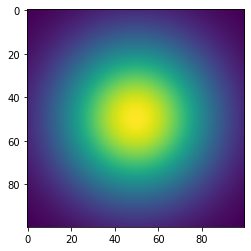

In [2]:
L = 100
round_disc = gaussian_2d(L,sigma_x=L/4, sigma_y=L/4)
plt.imshow(round_disc)


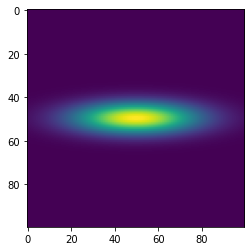

In [3]:
oval_disc = gaussian_2d(L,sigma_x=L/20, sigma_y=L/5)
plt.imshow(oval_disc)


2021-09-23 14:01:03,299 INFO Attempting to create an Image object from Numpy array.
2021-09-23 14:01:03,310 INFO Loading images from cache
2021-09-23 14:01:03,311 INFO Applying forward transformations in pipeline
2021-09-23 14:01:03,312 INFO All forward transformations applied
2021-09-23 14:01:03,312 INFO Loaded 10 images


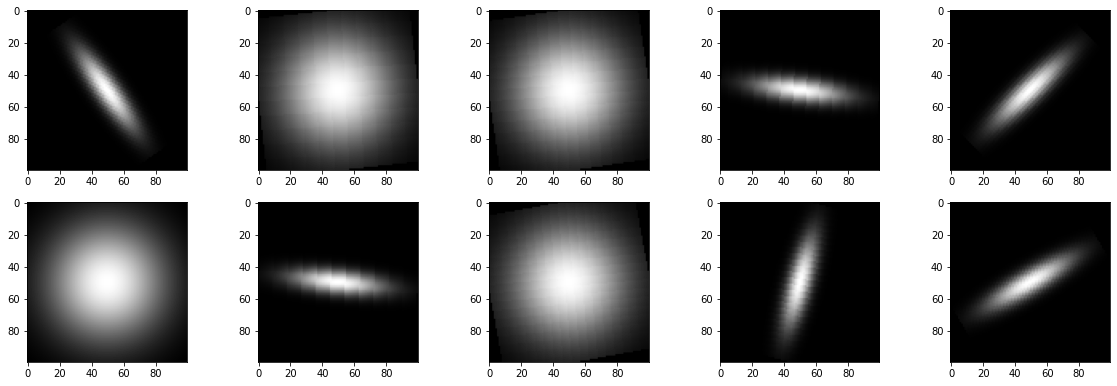

In [4]:
# How many entries (angles) in our stack
N = 512
thetas  = np.linspace(start=0, stop=360, num=N, endpoint=False)

classRound = np.zeros((N, L, L))
classOval = np.zeros((N, L, L))


for i, theta in enumerate(thetas):
    classRound[i] = np.asarray(PILImage.fromarray(round_disc).rotate(theta))
    classOval[i] = np.asarray(PILImage.fromarray(oval_disc).rotate(theta))
    
# We'll make an example data set by concatentating then shuffling these.
example_array = np.concatenate((classRound, classOval))
np.random.shuffle(example_array)

# So now that we have cooked up an example dataset, lets create an ASPIRE source
src = ArrayImageSource(example_array)

# Let's peek at the images to make sure they're shuffled up nicely
src.images(0,10).show()

In [5]:
rir = RIRClass2D(
    src,
    fspca_components=400,
    bispectrum_components=300, # Compressed Features after last PCA stage.
    n_nbor=5,
    n_classes=10,
    large_pca_implementation="legacy",
    nn_implementation="sklearn", # I have sk version output hist of "distance" distribution for consideration.
    bispectrum_implementation="legacy",
)  # replaced PCA and NN codes with third party (slightly faster and more robust)


In [6]:
classes, reflections, rotations, corr = rir.classify()

2021-09-23 14:01:04,044 INFO Expanding 2D image in a frequency-domain Fourier–Bessel basis using the fast method.
2021-09-23 14:01:05,194 INFO Loading images from cache
2021-09-23 14:01:05,234 INFO Applying forward transformations in pipeline
2021-09-23 14:01:05,234 INFO All forward transformations applied
2021-09-23 14:01:05,235 INFO Loaded 1024 images
2021-09-23 14:01:05,304 INFO Trying NFFT backend finufft
2021-09-23 14:01:05,311 INFO NFFT backend finufft usable.
2021-09-23 14:01:05,312 INFO Trying NFFT backend cufinufft
2021-09-23 14:01:05,314 INFO NFFT backend cufinufft not usable:
	No module named 'pycuda'
2021-09-23 14:01:05,315 INFO Trying NFFT backend pynfft
2021-09-23 14:01:05,316 INFO NFFT backend pynfft not usable:
	No module named 'pynfft'
2021-09-23 14:01:05,317 INFO Selected NFFT backend = finufft.
2021-09-23 14:01:08,156 INFO Estimating the noise of images.
2021-09-23 14:01:08,157 INFO Determining Noise variance in batches of 512
2021-09-23 14:01:08,158 INFO Loading ima

2021-09-23 14:01:11,648 INFO Select 10 Classes from Nearest Neighbors
2021-09-23 14:01:11,650 INFO Loading images from cache
2021-09-23 14:01:11,665 INFO Applying forward transformations in pipeline
2021-09-23 14:01:11,673 INFO All forward transformations applied
2021-09-23 14:01:11,675 INFO Loaded 1024 images


100%|██████████| 10/10 [00:00<00:00, 20.81it/s]


2021-09-23 14:01:12,265 INFO Loading images from cache
2021-09-23 14:01:12,267 INFO Applying forward transformations in pipeline
2021-09-23 14:01:12,267 INFO All forward transformations applied
2021-09-23 14:01:12,268 INFO Loaded 10 images


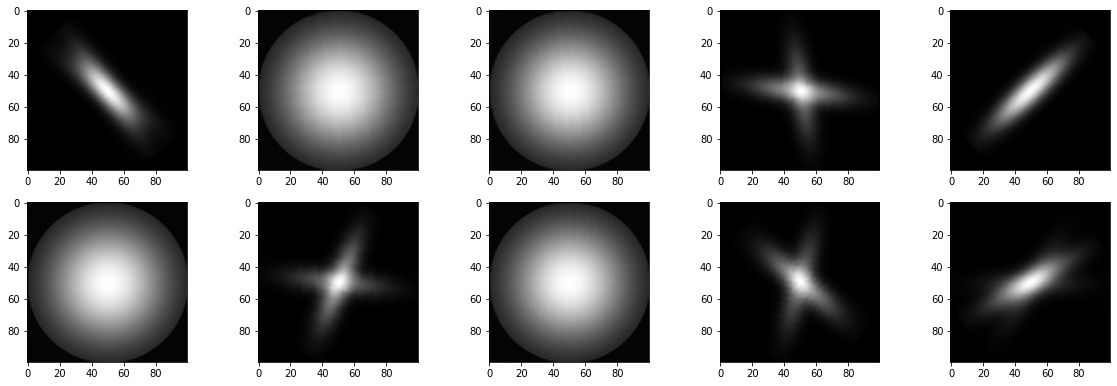

In [7]:
avgs = rir.output(classes, reflections, rotations)
avgs.images(0,10).show()